## CSCI-5800 |  BMS Lab06 - Data Cleaning for Runtime SoC Estimation 🧪
<h5>Done by Sundeep Dayalan (02-29-2024)</h5>

> **See Also**: To refer full code, visit [GitHub Code](https://github.com/Sundeep-D/Battery-management-System-Labs).

## Calculating SoC and storing in CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

def printmd(string, size=2):
    display(Markdown(f'<h{size}>{string}</h{size}>'))
    
# Read the CSV file
df3 = pd.read_csv("OCV-CCV-LOG.csv")

# Calculate State of Charge (SoC)
df3['1-SoC'] = (1-(271 - df3['TotalCapacity']) / 271) * 100
df3['SoC'] = ((271 - df3['TotalCapacity']) / 271) * 100

# Write the calculated SoC values to a new CSV file
df3.to_csv("OCV-CCV-LOG-UPDATED.csv", index=False)

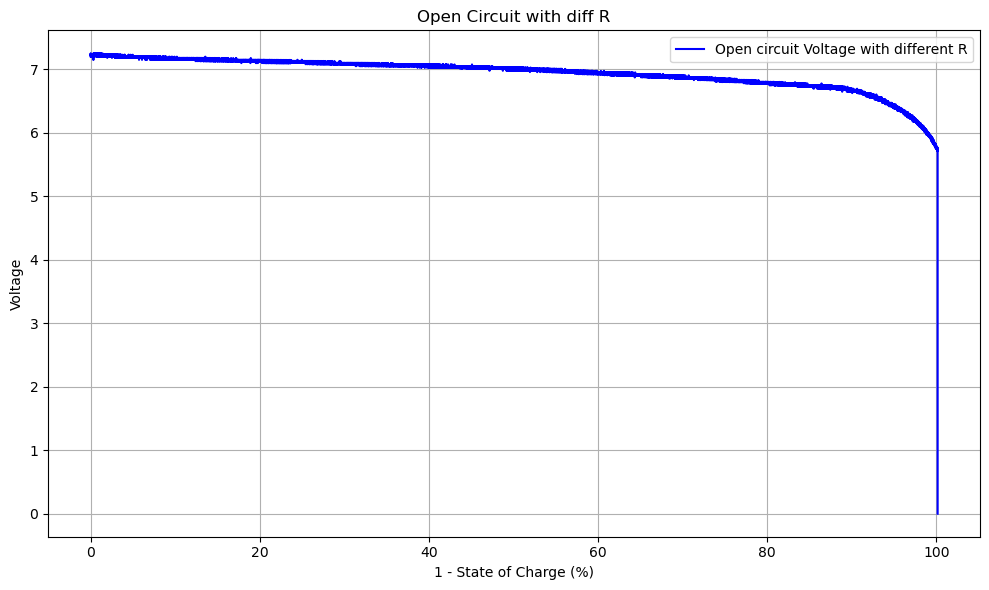

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df3 = pd.read_csv("OCV-CCV-LOG-UPDATED.csv")

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data for the third CSV file
ax.plot(df3['1-SoC'], df3['OCV'], marker='', linestyle='-', color='b', label='Open circuit Voltage with different R')
ax.set_title('Open Circuit with diff R')
ax.set_xlabel('1 - State of Charge (%)')
ax.set_ylabel('Voltage')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


## Drop duplicate OCV values and its corresponding rows

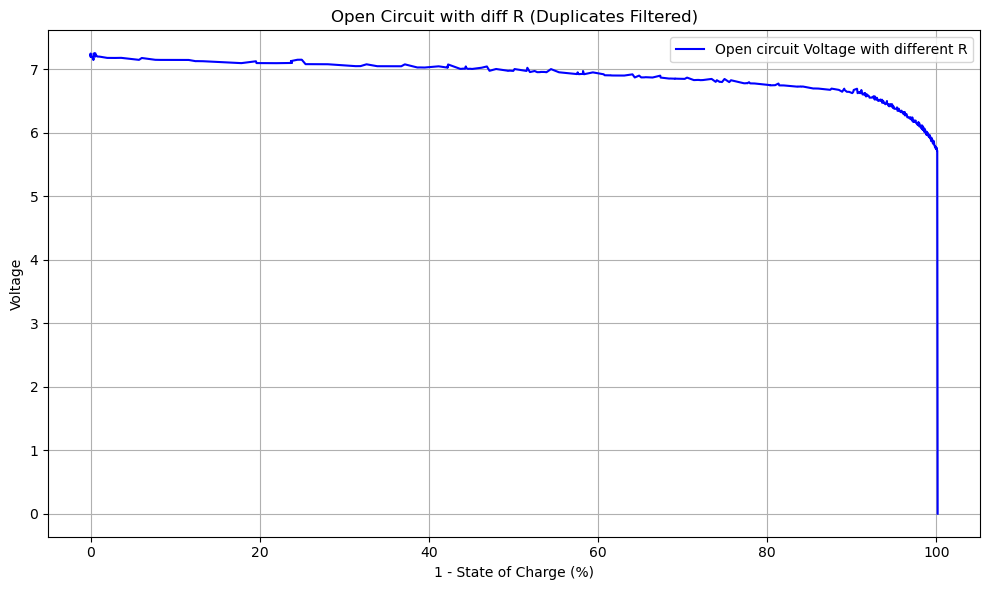

<h2>Number of samples before removing duplicates: 80244</h2>

<h2>Number of samples after removing duplicates: 378</h2>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df3 = pd.read_csv("OCV-CCV-LOG.csv")

# Calculate State of Charge (SoC)
df3['SoC'] = ((271 - df3['TotalCapacity']) / 271) * 100
df3['1-SoC'] = (1-(271 - df3['TotalCapacity']) / 271) * 100

# Write the calculated SoC values to a new CSV file
df3.to_csv("OCV-CCV-LOG-UPDATED.csv", index=False)

# Remove duplicate rows based on the 'OCV' column
df3_no_duplicates = df3.drop_duplicates(subset=['OCV'])

# Write the data with duplicates removed to a new CSV file
df3_no_duplicates.to_csv("OCV-CCV-LOG-UPDATED-DUP-FILTER.csv", index=False)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data for the third CSV file
ax.plot(df3_no_duplicates['1-SoC'], df3_no_duplicates['OCV'], marker='', linestyle='-', color='b', label='Open circuit Voltage with different R')
ax.set_title('Open Circuit with diff R (Duplicates Filtered)')
ax.set_xlabel('1 - State of Charge (%)')
ax.set_ylabel('Voltage')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

printmd(f"Number of samples before removing duplicates: {df3.shape[0]}")
printmd(f"Number of samples after removing duplicates: {df3_no_duplicates.shape[0]}")


## Smoothed OCV values

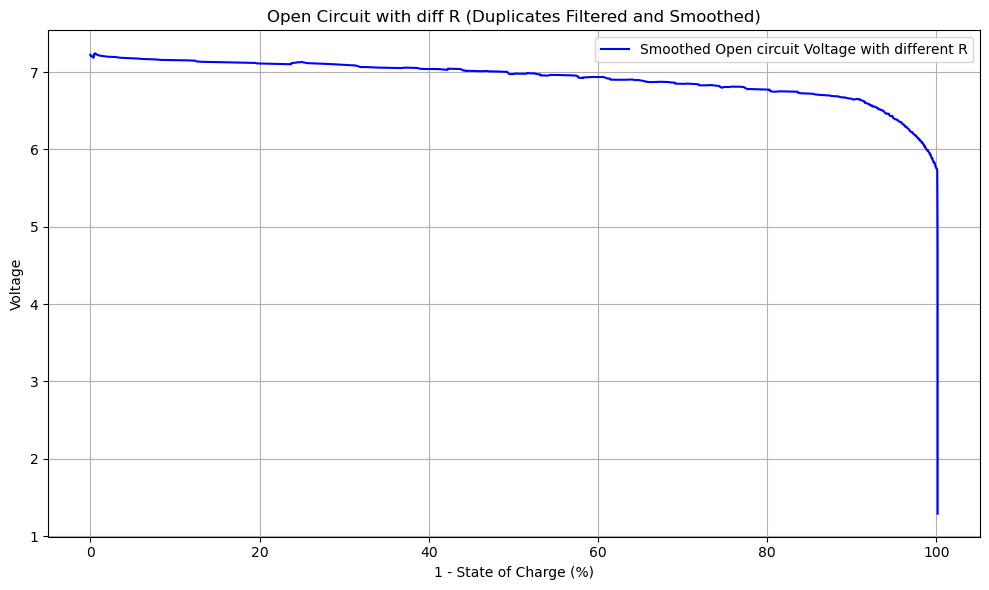

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df3 = pd.read_csv("OCV-CCV-LOG.csv")

# Calculate State of Charge (SoC)
df3['SoC'] = abs(((271 - df3['TotalCapacity']) / 271) * 100)
df3['1-SoC'] = abs ((1 - (271 - df3['TotalCapacity']) / 271) * 100)

# Write the calculated SoC values to a new CSV file
df3.to_csv("OCV-CCV-LOG-UPDATED.csv", index=False)

# Remove duplicate rows based on the 'OCV' column
df3_no_duplicates = df3.drop_duplicates(subset=['OCV']).copy()  # Use copy() to avoid SettingWithCopyWarning

# Apply a simple moving average to smooth the 'OCV' values
window_size = 5  # Adjust the window size for smoothing
df3_no_duplicates['OCV_smoothed'] = df3_no_duplicates['OCV'].rolling(window=window_size).mean()

# Write the data with duplicates removed and smoothed values to a new CSV file
df3_no_duplicates.to_csv("OCV-CCV-LOG-UPDATED-DUP-FILTER-SMOOTHED.csv", index=False)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data for the third CSV file
ax.plot(df3_no_duplicates['1-SoC'], df3_no_duplicates['OCV_smoothed'], marker='', linestyle='-', color='b', label='Smoothed Open circuit Voltage with different R')
ax.set_title('Open Circuit with diff R (Duplicates Filtered and Smoothed)')
ax.set_xlabel('1 - State of Charge (%)')
ax.set_ylabel('Voltage')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


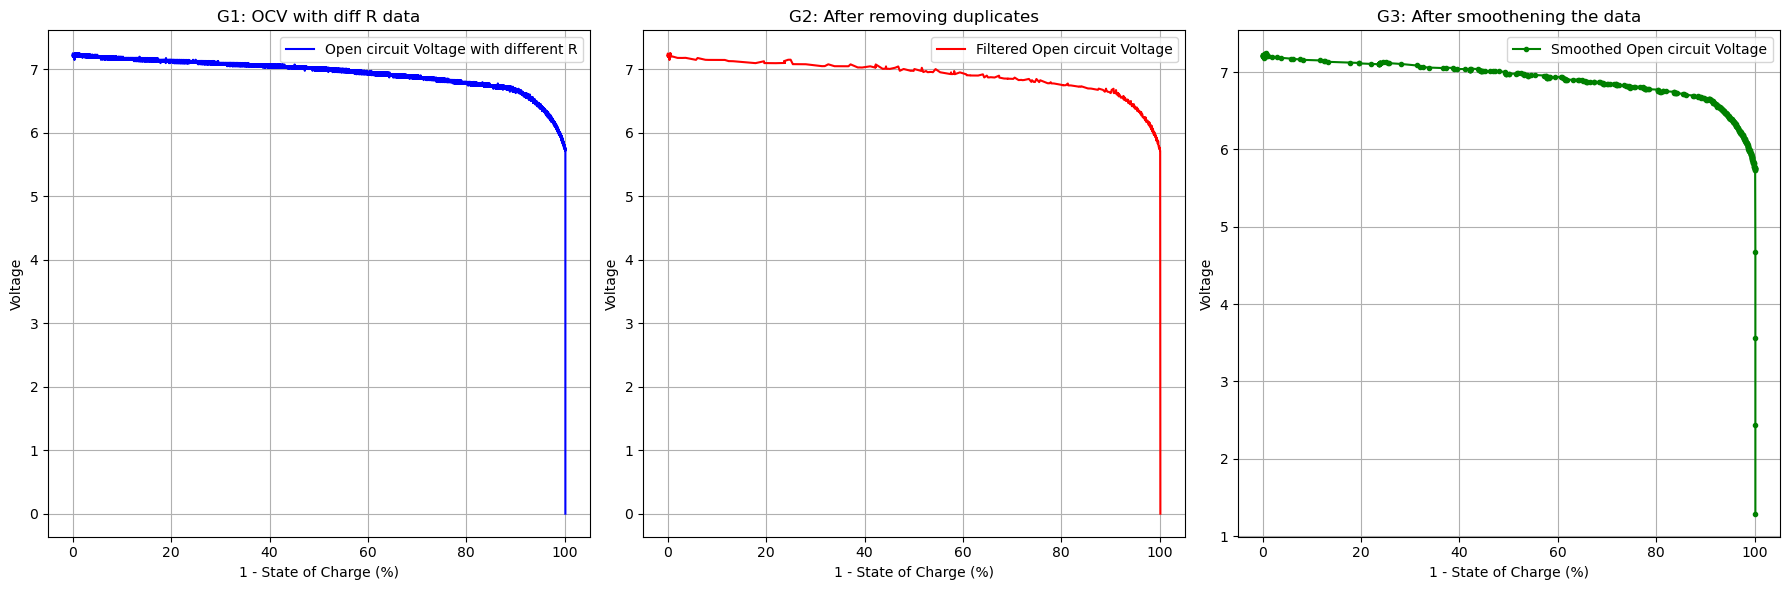

<h2>Number of samples before data cleaning: 80244</h2>

<h2>Number of samples after data cleaning: 378</h2>

Values in File 3 as comma-separated with 4 decimals: 7.0600, 7.0800, 7.0600, 7.0800, 7.0300, 7.0600, 7.0300, 7.0300, 7.0600, 7.0300, 7.0600, 7.0300, 7.0100, 6.9800, 7.0800, 7.0800, 7.0800, 7.0600, 7.0600, 7.0800, 7.0600, 7.0800, 7.0800, 7.0800, 7.0300, 7.0600, 7.0300, 7.0300, 7.0100, 7.0100, 7.0100, 6.9800, 7.0100, 6.9800, 6.9800, 6.9800, 6.9600, 6.9600, 6.9600, 6.9300, 6.9600, 6.9300, 6.9300, 6.9300, 6.9300, 6.9600, 6.9600, 6.9300, 6.9600, 6.9300, 6.9600, 6.9600, 6.9300, 6.9600, 6.9800, 6.9800, 6.9100, 6.9100, 6.9100, 6.8800, 6.8800, 6.9100, 6.8800, 6.8800, 6.9100, 6.8600, 6.8600, 6.8600, 6.8800, 6.8600, 6.8600, 6.8600, 6.8800, 6.8800, 6.8600, 6.9100, 6.8400, 6.8400, 6.8400, 6.8400, 6.8800, 6.8600, 6.8400, 6.8400, 6.8400, 6.8600, 6.8800, 6.8100, 6.8400, 6.8100, 6.8100, 6.8100, 6.8100, 6.8100, 6.8100, 6.8400, 6.8100, 6.8600, 6.7900, 6.8100, 6.7900, 6.7900, 6.7900, 6.7900, 6.7900, 6.7900, 6.8400, 6.7900, 6.7600, 6.7600, 6.7900, 6.7600, 6.7600, 6.7600, 6.7600, 6.7600, 6.8100, 6.7600, 6.7

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
df1 = pd.read_csv("OCV-CCV-LOG-UPDATED.csv")
df2 = pd.read_csv("OCV-CCV-LOG-UPDATED-DUP-FILTER.csv")
df3 = pd.read_csv("OCV-CCV-LOG-UPDATED-DUP-FILTER-SMOOTHED.csv")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for OCV-CCV-LOG-UPDATED.csv
axes[0].plot(df1['1-SoC'], df1['OCV'], marker='', linestyle='-', color='b', label='Open circuit Voltage with different R')
axes[0].set_title('G1: OCV with diff R data')
axes[0].set_xlabel('1 - State of Charge (%)')
axes[0].set_ylabel('Voltage')
axes[0].legend()
axes[0].grid(True)

# Plot for OCV-CCV-LOG-UPDATED-DUP-FILTER.csv
axes[1].plot(df2['1-SoC'], df2['OCV'], marker='', linestyle='-', color='r', label='Filtered Open circuit Voltage')
axes[1].set_title('G2: After removing duplicates')
axes[1].set_xlabel('1 - State of Charge (%)')
axes[1].set_ylabel('Voltage')
axes[1].legend()
axes[1].grid(True)

# Plot for OCV-CCV-LOG-UPDATED-DUP-FILTER-SMOOTHED.csv
axes[2].plot(df3['1-SoC'], df3['OCV_smoothed'], marker='.', linestyle='-', color='g', label='Smoothed Open circuit Voltage')
axes[2].set_title('G3: After smoothening the data')
axes[2].set_xlabel('1 - State of Charge (%)')
axes[2].set_ylabel('Voltage')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Print the number of rows in File 1 and File 3
printmd(f"Number of samples before data cleaning: {df1.shape[0]}")
printmd(f"Number of samples after data cleaning: {df3.shape[0]}")
# Convert the values in File 3 to comma-separated string with 4 decimals
rows_as_csv = ', '.join(map(lambda x: f"{x:.4f}", df3['Voltage1']))

# Print the comma-separated values
print(f"Values in File 3 as comma-separated with 4 decimals: {rows_as_csv}")